# 6.2 Exploring relationships

### This script contains the following:

#### 1. Import Visualization Libraries and Data
#### 2. Explore Relationships
#### 3. Correlation heatmap with seaborn
#### 4. Scatterplots with seaborn
#### 5. Pair Plots
#### 6. Further exploration of the data
#### 7. Categorical Plots

### 1. Import Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Path to main project folder

path = r'C:\Users\Mark\_Electric Power Plant Emissions'

In [3]:
# Retrieve the cleaned data file

df = pd.read_pickle(os.path.join(path, '03 Scripts', 'Prepared Data', 'emissions2016-2019-clean.pkl'))

In [4]:
# Ensure nothing looks out of place with the imported dataframe

df.head()

,Plant Code,Year,Plant Name,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),...,Fuel Use(generate electric MMBtu),Fuel Use(useful thermal output MMBtu),Fuel Consumed Qty,Fuel Units,Tons of CO2 Emissions,CO2 Emissions Metric Tonnes,NERC Region,Balancing Authority Code,Balancing Authority Name,EIA Balancing Authority Region
0,3,2016,Barry,AL,Electric Power,1,CA,NG,GAS,2918277000,...,895285,0,878457,Mcf,52374.0,47513.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast
1,3,2016,Barry,AL,Electric Power,1,CT,NG,GAS,5483083000,...,57790622,0,56694492,Mcf,3380728.0,3066976.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast
2,3,2016,Barry,AL,Electric Power,1,ST,BIT,COAL,4278313064,...,43137858,0,2044002,Tons,4436536.0,4024799.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast
3,3,2016,Barry,AL,Electric Power,1,ST,NG,GAS,91217936,...,926020,0,908006,Mcf,54172.0,49144.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast
4,7,2016,Gadsden,AL,Electric Power,1,ST,NG,GAS,190978000,...,2207718,404532,2570783,Mcf,152816.0,138633.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast


In [5]:
# Check rows and columns

df.shape

(21480, 22)

### 2. Explore Relationships

In [6]:
# A subset dataframe with just the numerical variables

df_numeric = df[['Plant Code', 
                'Year', 'Sector Code', 'Generation (kWh)', 
                'Useful Thermal Output (MMBtu)', 
                'Total Fuel Use (MMBtu)', 
                'Fuel Use(generate electric MMBtu)', 
                'Fuel Use(useful thermal output MMBtu)', 
                'Fuel Consumed Qty', 
                'Tons of CO2 Emissions', 
                'CO2 Emissions Metric Tonnes']]

# Correlation matrix
df_numeric.corr()

,Plant Code,Year,Sector Code,Generation (kWh),Useful Thermal Output (MMBtu),Total Fuel Use (MMBtu),Fuel Use(generate electric MMBtu),Fuel Use(useful thermal output MMBtu),Fuel Consumed Qty,Tons of CO2 Emissions,CO2 Emissions Metric Tonnes
Plant Code,1.000000,0.019270,0.433120,-0.052915,0.089331,-0.071312,-0.081847,0.095295,0.080976,-0.104255,-0.104255
Year,0.019270,1.000000,0.002110,0.001744,-0.001358,-0.002042,-0.002000,-0.000808,0.017455,-0.007223,-0.007223
Sector Code,0.433120,0.002110,1.000000,-0.129022,0.316153,-0.095748,-0.129202,0.314122,-0.038924,-0.097464,-0.097464
Generation (kWh),-0.052915,0.001744,-0.129022,1.000000,0.069944,0.964113,0.965219,0.086524,0.522230,0.940943,0.940943
Useful Thermal Output (MMBtu),0.089331,-0.001358,0.316153,0.069944,1.000000,0.128656,0.028952,0.979908,0.231765,0.080414,0.080414
Total Fuel Use (MMBtu),-0.071312,-0.002042,-0.095748,0.964113,0.128656,1.000000,0.994429,0.146720,0.552222,0.973673,0.973673
Fuel Use(generate electric MMBtu),-0.081847,-0.002000,-0.129202,0.965219,0.028952,0.994429,1.000000,0.045113,0.530729,0.972944,0.972944
Fuel Use(useful thermal output MMBtu),0.095295,-0.000808,0.314122,0.086524,0.979908,0.146720,0.045113,1.000000,0.256415,0.093903,0.093903
Fuel Consumed Qty,0.080976,0.017455,-0.038924,0.522230,0.231765,0.552222,0.530729,0.256415,1.000000,0.357249,0.357249
Tons of CO2 Emissions,-0.104255,-0.007223,-0.097464,0.940943,0.080414,0.973673,0.972944,0.093903,0.357249,1.000000,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

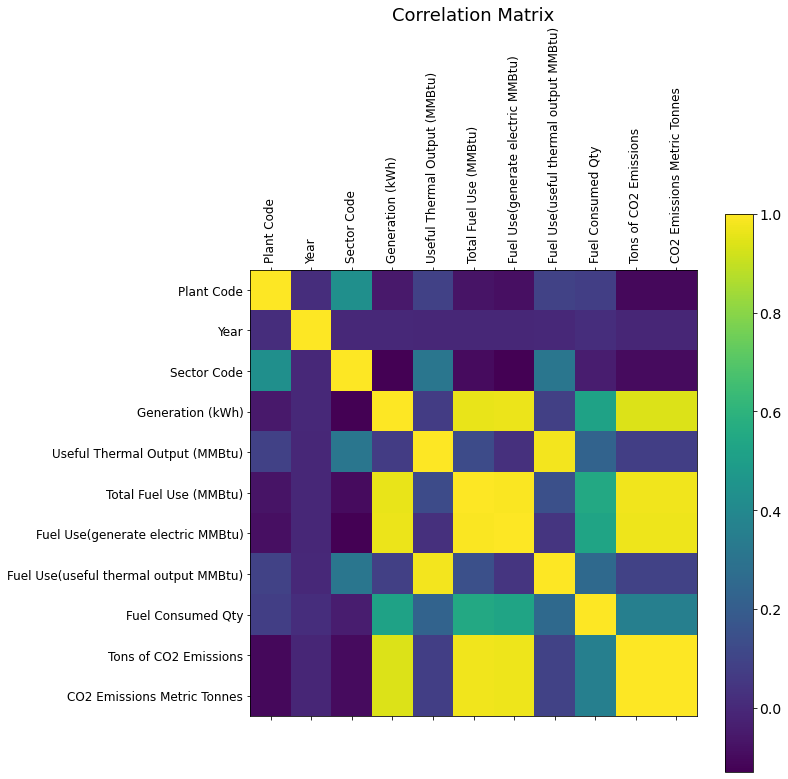

In [7]:
# Matplotlib heatmap with labels, a legend, and change the size of the heatmap

# size adjusted
f = plt.figure(figsize=(10, 10))

# size adjusted
plt.matshow(df_numeric.corr(), fignum=f.number)

# size adjusted
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=12, rotation=90)
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=12)

# color
cb = plt.colorbar()

# label size
cb.ax.tick_params(labelsize=14)

# title font size
plt.title('Correlation Matrix', fontsize=18)

### 3. Correlation heatmap with seaborn

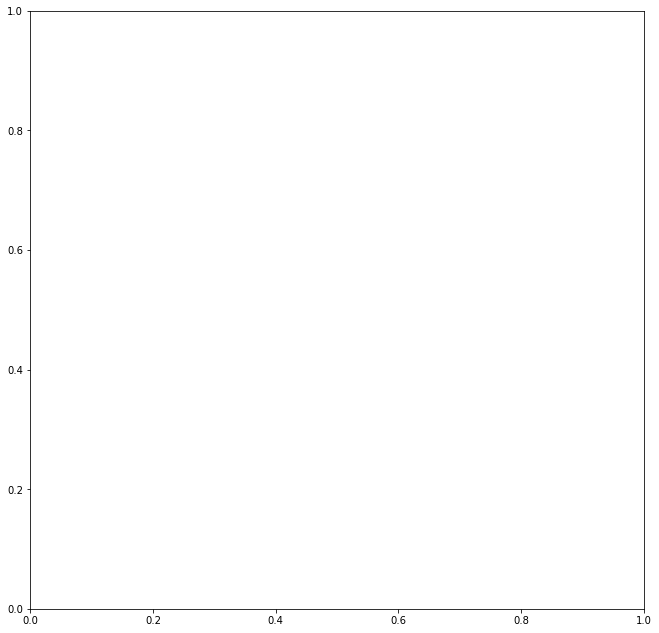

In [8]:
# Matplotlib empty output to show the subplots

f, ax = plt.subplots(figsize=(11, 11))

In [9]:
# Correlation heatmap in seaborn: applies a heatmap onto the correlation matrix and the subplots defined above

sns.set(font_scale=0.94)
seaborn_corr = sns.heatmap(df_numeric.corr(), annot=True, ax = ax)

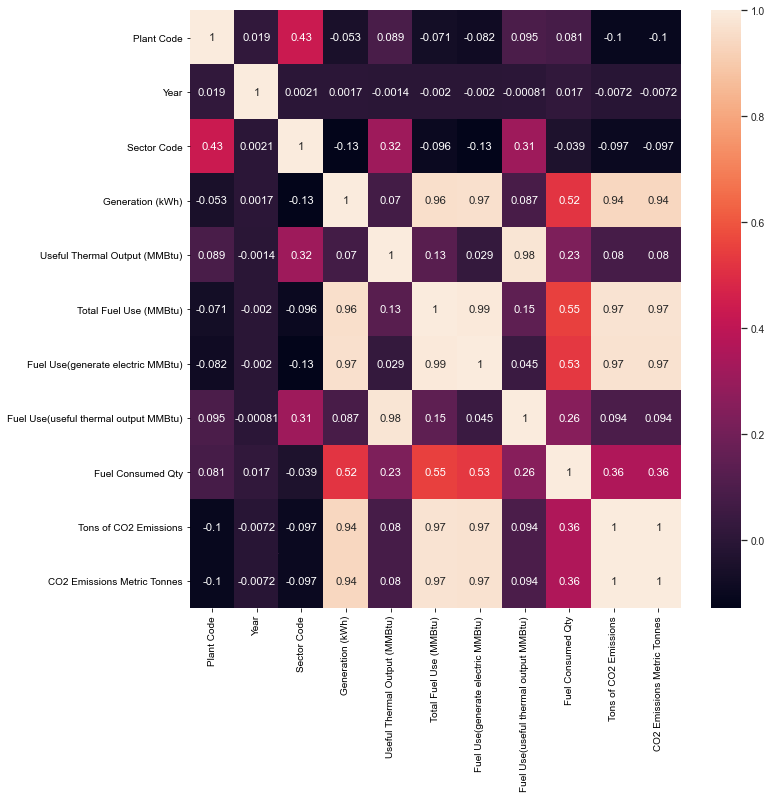

In [10]:
# Draw the seaborn correlation heatmap

seaborn_corr.figure

In the correlation figure above, represented by the light bage shades, we see a very high correlation between CO2 emissions and the generation of electricity, and also the fuel used to generate it.

### 4. Scatterplots with seaborn

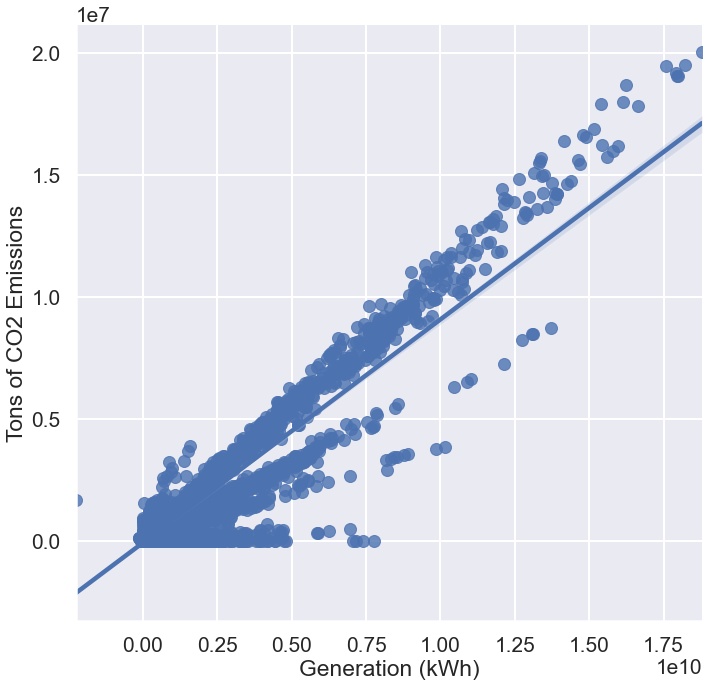

In [11]:
# Scatterplot with seaborn

sns.set_context('poster', font_scale=0.95)
sns.lmplot(x = 'Generation (kWh)', y = 'Tons of CO2 Emissions', data = df, height=10)

In the scatterplot above we see further evidence of the strong correlation between CO2 emissions and the generation of electricity. While most of the data points appear to be close to the trend line, there appears to be a substantial number of data points further away from the main trending line. There appears to be four different trends, possibly representing diffent sectors, so this needs further investigation.

### 5. Pair Plots

In [12]:
# Subset only the variables to use in the pair plot

pair_plot_subset = df[['Year', 'Generation (kWh)',  'Tons of CO2 Emissions', 'Sector Group']]

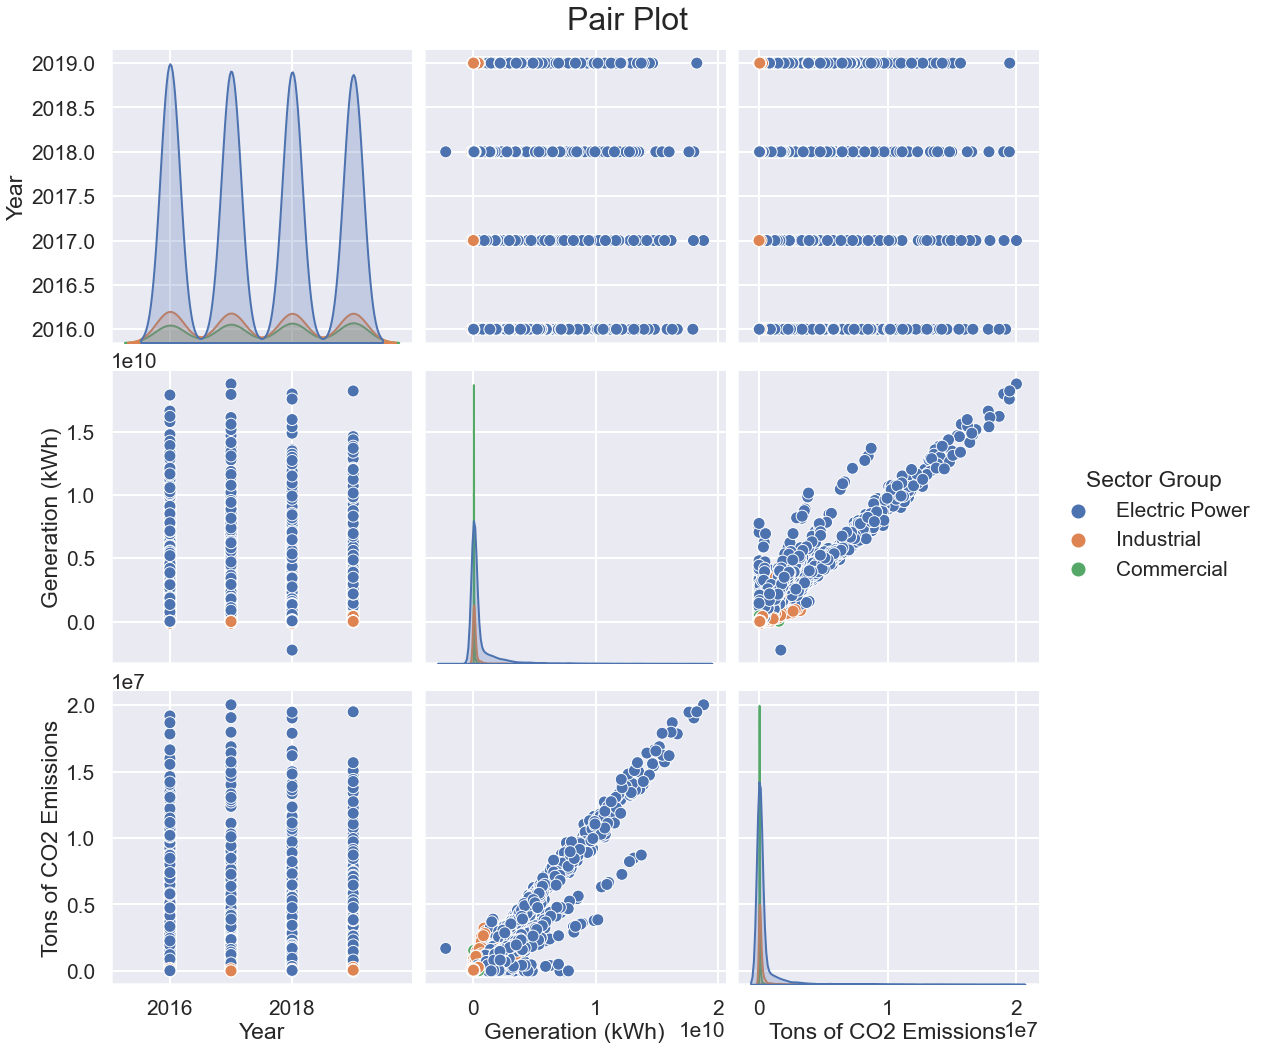

In [13]:
# A pair plot comparing the "Year", "Generation (kWh)", "Tons of CO2 Emissions", and "Sector Group"

sns.set_context('poster', font_scale=0.95)
pair_plot1 = sns.pairplot(pair_plot_subset, height=5, hue='Sector Group')
pair_plot1.fig.suptitle('Pair Plot', fontsize=32)
pair_plot1.fig.subplots_adjust(top=0.94)


In the Pair Plot above we see a clear indication that the generation of electric power is by far the largest contributor to CO2 emissions. Second row, far right, we see that the "Tons of CO2 Emissioons" and "Generation (kWh)" have a very strong correlation with especially the "Electric Power" group. The oranges (Industrial) and greens (Commercial), appear to play a very minute role according to the scatterplot result.

C:\Users\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Generation (kWh)', ylabel='Density'>

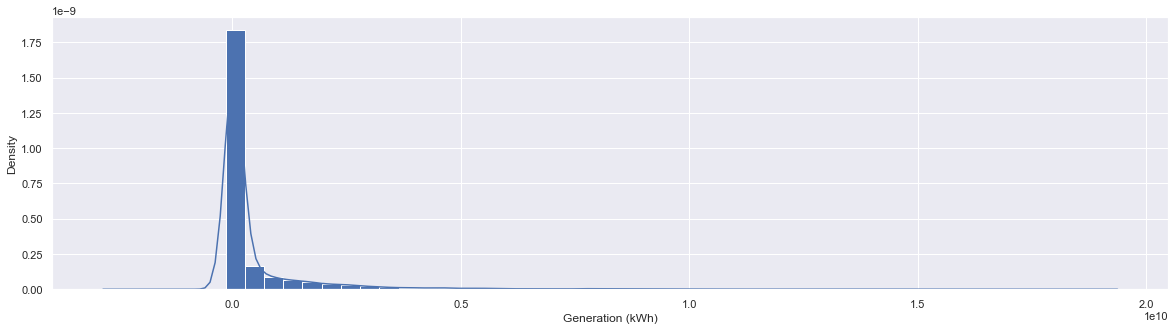

In [14]:
# The chart below is a close-up of the "Generation (kWh)" variable

sns.set(rc={'figure.figsize':(20, 5)})
sns.distplot(pair_plot_subset['Generation (kWh)'], hist_kws={'alpha':1})

### 6. Further exploration of the data

<AxesSubplot:title={'center':'Sector Group'}, xlabel='Sector Group', ylabel='Frequency'>

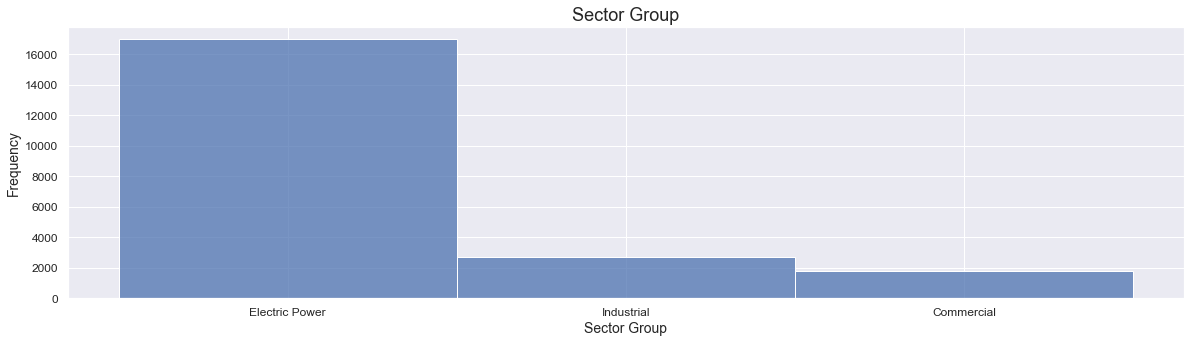

In [15]:
# Histogram to visualize the distribution of "Sector Group" variable

sns.set(rc={'figure.figsize':(20, 5)})
plt.xticks(rotation=0)
plt.tick_params(labelsize=12)

# Labeling for this chart
plt.title('Sector Group', fontsize=18)
plt.xlabel('Sector Group', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

sns.histplot(df['Sector Group'], bins = 3)

In the histogram above, we see, once again, the "Electric Power" sector record frequency outnumbering the other two sectors by a substantially large amount.

Text(0, 0.5, 'Frequency')

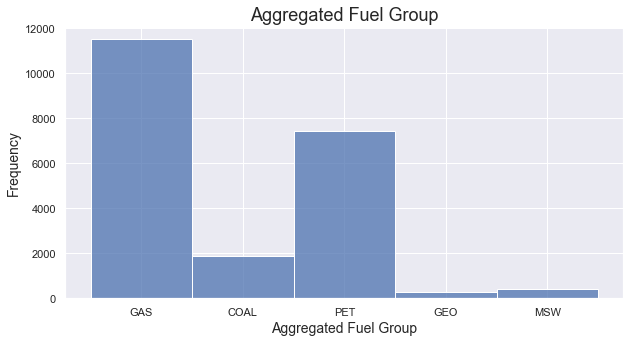

In [16]:
# Histogram to visualize the distribution of "Year" variable

sns.set(rc={'figure.figsize':(10, 5)})
sns.histplot(df['Aggregated Fuel Group'], bins = 4)

# Labeling for this chart
plt.title('Aggregated Fuel Group', fontsize=18)
plt.xlabel('Aggregated Fuel Group', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

In the histogram above, we see the aggregated fuel groups. Gas and petroleum have the highest frequencies.

Text(0, 0.5, 'Frequency')

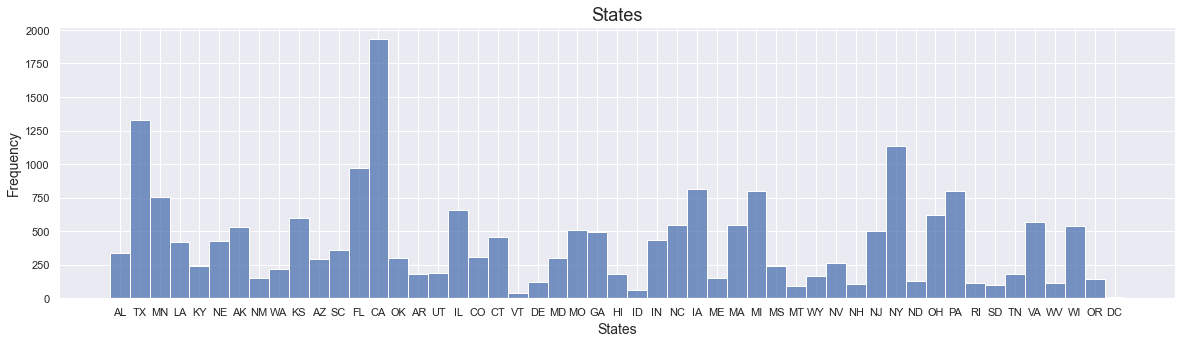

In [17]:
# Histogram to visualize the distribution of "State" variable

sns.set(rc={'figure.figsize':(20, 5)})
sns.histplot(df['State'], bins = 51)

# Labeling for this chart
plt.title('States', fontsize=18)
plt.xlabel('States', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

In the histogram above, we see California, Texas, New York, and Florida with the highest frequencies. This is probably expected since they are the bigger states in terms of population size.

In [18]:
# Max, mean, and min on customer profiles for usage expenditure

df.groupby('State').agg({'State': ['count']}).reset_index().sort_values([('State', 'count')], ascending = False).head(3)

State      
         count
4     CA  1929
43    TX  1329
34    NY  1134

### 7. Categorical Plots

In [19]:
# An emission level flag to identify emissions values that are below the 2016 average

df.loc[(df['Tons of CO2 Emissions'] <= (388677)), 'Emission Levels'] = 'low'

In [20]:
# A flag to identify emissions values that are greater the 2016 average

df.loc[(df['Tons of CO2 Emissions'] > (388677)), 'Emission Levels'] = 'medium '

In [21]:
# A flag to identify emissions values that are four times greater than the 2016 average

df.loc[(df['Tons of CO2 Emissions'] > (388677*4)), 'Emission Levels'] = 'high '

In [22]:
# Review the frequency of the "Top Sector Emissions" column

df['Emission Levels'].value_counts(dropna = False)

low        18392
medium      1756
high        1332
Name: Emission Levels, dtype: int64

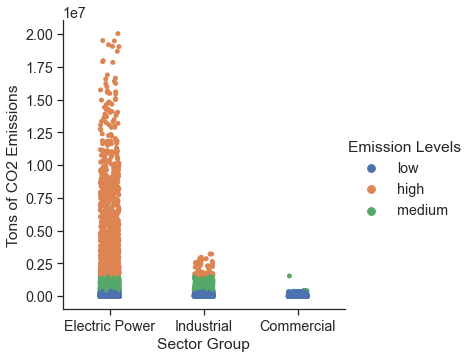

In [23]:
# A seaborn categorical plot using the "Emission Levels" categories created above
# Here we look at the CO2 emissions by sector

sns.set(style="ticks")
sns.set_context("notebook", font_scale=1.3)
g = sns.catplot(x='Sector Group', y='Tons of CO2 Emissions', hue='Emission Levels', data=df)

In the categorical plot above, we see that even though the "high emmitter" category has the lowest count, it's values are so high that it still outpaces the other two groups by a substantial amount. It should be noted that at this stage I have not checked the variance, so a more ideal scenario might be to see for outliers and do a deeper analysis.

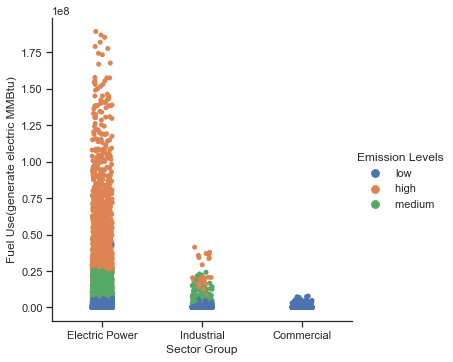

In [24]:
# A seaborn categorical plot using the "Emission Levels" categories created above
# Here we look at the consumed fuel by sector

sns.set(style="ticks")
g = sns.catplot(x='Sector Group', y='Fuel Use(generate electric MMBtu)', hue='Emission Levels', data=df)

In the categorical plot above, we see the fuel consumed and the emissions produced by sector group. Here we see high level emitters contributing the largest portion to emissions during fuel consumption.

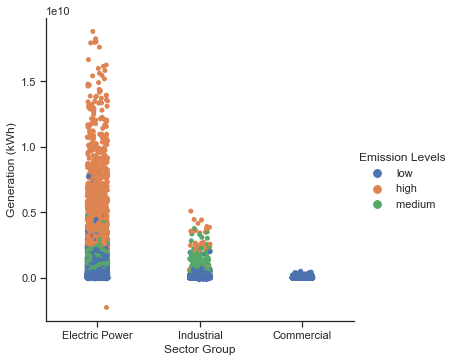

In [25]:
# A seaborn categorical plot using the "Emission Levels" categories created above
# Here we look at the generation of electric power by sector

sns.set(style="ticks")
g = sns.catplot(x='Sector Group', y='Generation (kWh)', hue='Emission Levels', data=df)

In the categorical plot above, we see the fuel consumed and the emissions produced by sector group. Here we see high level emitters contributing the largest portion to emissions during fuel consumption.

In [1]:
# Export dataframe since it now has an emission level flag

#df.to_pickle(os.path.join(path, '03 Scripts','Prepared Data', 'emissions2015-2019-clean-el.pkl'))

In [3]:
# Export to csv

#df.to_csv(os.path.join(path, '03 Scripts','Prepared Data', 'emissions2015-2019-clean-el.csv'))